# TAREA 6 MÉTODOS NUMÉRICOS
## Regresión Lineal Múltiple con Step Forward Feature Selection

---

## 1. Introducción

### 1.1 Contexto y Motivación

League of Legends (LoL) es uno de los videojuegos multijugador más populares del mundo, con millones de partidas jugadas diariamente. Cada partida genera una gran cantidad de datos estadísticos sobre el desempeño de los jugadores, desde métricas básicas como asesinatos y muertes, hasta estadísticas más complejas como daño infligido, oro acumulado y objetivos del mapa capturados.

La capacidad de predecir aspectos de una partida basándose en el desempeño de los jugadores tiene aplicaciones prácticas importantes:
- **Análisis competitivo**: Equipos profesionales pueden identificar patrones de juego efectivos
- **Balanceo del juego**: Desarrolladores pueden ajustar mecánicas basándose en datos
- **Experiencia del jugador**: Sistemas de matchmaking más precisos

### 1.2 Objetivo del Proyecto

El presente trabajo tiene como objetivo principal **predecir el oro total acumulado 
por un jugador en una partida de League of Legends** utilizando técnicas de regresión 
lineal múltiple. Específicamente, buscamos responder la pregunta:

> *"¿Es posible estimar cuánto oro acumulará un jugador basándose en sus 
> estadísticas de desempeño durante la partida?"*

Para lograr este objetivo, implementaremos el algoritmo **Step Forward Feature Selection (SFFS)**, una técnica de selección de variables que identifica iterativamente las características más relevantes para la predicción, evaluando su contribución mediante la métrica **Mean Absolute Error (MAE)**.

### 1.3 Estructura del Informe

El documento se organiza de la siguiente manera:
1. **Introducción**: Contexto, objetivos y descripción del dominio
2. **Metodología**: Explicación del algoritmo SFFS y proceso de modelado
3. **Análisis Exploratorio**: Exploración y preparación de datos
4. **Implementación SFFS**: Desarrollo del algoritmo de selección de variables
5. **Resultados**: Evaluación del modelo y métricas de desempeño
6. **Conclusiones**: Hallazgos principales e interpretación de resultados

---

## 2. Marco Teórico

### 2.1 League of Legends: Fundamentos del Juego

#### 2.1.1 Mecánicas Básicas

League of Legends es un juego de estrategia en tiempo real tipo MOBA (Multiplayer Online Battle Arena) donde dos equipos de 5 jugadores compiten por destruir la base enemiga llamada "Nexus". Las características principales son:

**Estructura del Juego:**
- **Equipos**: 2 equipos de 5 jugadores (Equipo Azul vs Equipo Rojo)
- **Mapa**: Summoner's Rift, dividido en 3 carriles (Top, Mid, Bot) y una jungla
- **Objetivo final**: Destruir el Nexus enemigo
- **Duración típica**: 20-40 minutos por partida

**Campeones y Roles:**
Cada jugador selecciona un "campeón" (personaje) con habilidades únicas. Los roles típicos son:
- **Top Lane**: Luchadores resistentes (tanks/bruisers)
- **Jungle**: Cazadores que farmean la jungla y ayudan a otros carriles
- **Mid Lane**: Magos o asesinos con alto daño
- **ADC (Bot Lane)**: Tirador con daño físico sostenido
- **Support (Bot Lane)**: Apoyo que protege al ADC

#### 2.1.2 Mecánicas de Progresión

**Sistema de Oro:**
- Los jugadores acumulan oro eliminando minions, campeones enemigos y objetivos
- El oro se usa para comprar items que mejoran estadísticas
- Mayor oro = Mayor poder en el juego

**Sistema de Niveles:**
- Los campeones suben de nivel (máximo 18) ganando experiencia
- Cada nivel otorga mejoras de estadísticas y desbloquea/mejora habilidades

**Objetivos del Mapa:**
- **Torres**: Estructuras defensivas que otorgan oro y control del mapa
- **Dragones**: Monstruos neutrales que otorgan buffs permanentes al equipo
- **Baron Nashor**: Objetivo épico que otorga un buff poderoso temporal
- **Inhibidores**: Estructuras que, al destruirse, generan super minions

#### 2.1.3 Estadísticas Clave del Juego

Las métricas más importantes que se registran en cada partida son:

**Estadísticas de Combate:**
- **Kills (K)**: Asesinatos de campeones enemigos
- **Deaths (D)**: Muertes del jugador
- **Assists (A)**: Ayudas en asesinatos de aliados
- **KDA**: Ratio (Kills + Assists) / Deaths, indicador de desempeño

**Estadísticas de Daño:**
- **Daño Total Infligido**: Daño causado a campeones enemigos
- **Daño Físico/Mágico/Verdadero**: Tipos de daño distribuido
- **Daño Recibido**: Daño absorbido (importante para tanks)

**Estadísticas de Recursos:**
- **Oro Ganado**: Recurso económico acumulado
- **Oro Gastado**: Oro invertido en items
- **Minions Eliminados**: CS (Creep Score) - indicador de farmeo
- **Minions de Jungla**: Monstruos neutrales eliminados

**Estadísticas de Objetivos:**
- **Torres Destruidas**: Control de mapa
- **Inhibidores Destruidos**: Presión sobre el enemigo
- **Dragones/Baron Eliminados**: Buffs para el equipo

**Estadísticas de Visión:**
- **Wards Colocados**: Visión proporcionada
- **Wards Destruidos**: Control de visión enemiga
- **Vision Score**: Métrica compuesta de contribución a la visión

### 2.2 Dataset: Match Statistics Table

#### 2.2.1 Descripción General

El dataset `MatchStatsTbl.csv` contiene información detallada de aproximadamente **80,000 partidas** de League of Legends, incluyendo estadísticas individuales de jugadores por partida.

**Características principales:**
- **Observaciones**: ~80,000 registros (estadísticas individuales por jugador)
- **Variables**: 31 columnas con métricas de desempeño
- **Nivel de granularidad**: Estadísticas por jugador por partida
- **Período**: Datos históricos de partidas clasificatorias

#### 2.2.2 Variables Relevantes para el Análisis

**Variable Objetivo (Y):**
- `TotalGold`: Oro total acumulado por el jugador en la partida (variable continua)

**Variables Predictoras Potenciales (X):**

*Combate:*
- `kills`: Número de asesinatos
- `deaths`: Número de muertes
- `assists`: Número de asistencias

*Daño:*
- `DmgDealt`: Daño total infligido
- `DmgTaken`: Daño total recibido
- `TurretDmgDealt`: Daño a torres

*Recursos y Objetivos:*
- `MinionsKilled`: Minions eliminados (CS)
- `DragonKills`: Dragones capturados
- `BaronKills`: Baron Nashor eliminado

*Visión:*
- `visionScore`: Puntuación de visión del jugador

*Items (variables categóricas):*
- `item1` a `item6`: Items equipados

*Otros:*
- `Lane`: Carril donde jugó
- `Win`: Victoria o derrota (binaria)
- `CurrentMasteryPoints`: Puntos de maestría con el campeón

#### 2.2.3 Relevancia de las Variables

El oro total (`TotalGold`) es una métrica integral del desempeño del jugador que depende de múltiples factores:

- **Farmeo**: Más minions eliminados → más oro
- **Kills y Assists**: Asesinatos otorgan oro bonus
- **Objetivos**: Torres, dragones y Baron dan oro al equipo
- **Victoria**: Los ganadores suelen tener más oro por dominar el mapa

Esta variable es ideal para regresión lineal múltiple porque refleja el éxito acumulativo del jugador durante la partida.

---

## 3. Metodología

### 3.1 Algoritmo Step Forward Feature Selection (SFFS)

El algoritmo SFFS es una técnica de selección de características que construye el modelo de manera **greedy** (codiciosa), agregando variables una por una según su contribución a la precisión del modelo.

**Funcionamiento:**

1. **Inicialización**: 
   - Conjunto de variables candidatas: todas las variables disponibles
   - Conjunto de variables seleccionadas: vacío
   - Historial de MAE: vacío

2. **Iteración principal** (mientras haya variables candidatas):
   - Para cada variable candidata restante:
     - Entrenar modelo con variables_seleccionadas + variable_candidata
     - Calcular MAE del modelo
   - Seleccionar la variable que produce el menor MAE
   - Mover esa variable de candidatas a seleccionadas
   - Registrar el MAE en el historial

3. **Salida**:
   - Lista ordenada de variables por importancia
   - Evolución del MAE conforme se agregan variables
   - Modelo final con todas las variables

**Ventajas:**
- Identifica el orden de importancia de las variables
- Permite visualizar el punto de rendimiento óptimo
- Computacionalmente más eficiente que probar todas las combinaciones

**Limitaciones:**
- No garantiza la combinación óptima global (es un método greedy)
- No considera interacciones entre variables futuras
- Puede sobreajustar si se incluyen todas las variables

### 3.2 Métricas de Evaluación

**Mean Absolute Error (MAE):**
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

- Promedio de errores absolutos
- Interpretación: error promedio en segundos de predicción
- **Ventaja**: Fácil interpretación en las unidades originales

**Mean Squared Error (MSE):**
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

- Penaliza más los errores grandes
- Sensible a outliers

**R² Score (Coeficiente de Determinación):**
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

- Indica qué proporción de la varianza es explicada por el modelo
- Rango: 0 a 1 (mientras más cercano a 1, mejor)

---

## 4. Análisis Exploratorio de Datos

In [13]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

### 4.1 Carga y Exploración Inicial

In [14]:
# Cargar el dataset
df = pd.read_csv('MatchStatsTbl.csv')

# Información general del dataset
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras filas del dataset:")
display(df.head())

# Información de tipos de datos y valores nulos
print("\n" + "="*80)
print("TIPOS DE DATOS Y VALORES NULOS")
print("="*80)
df.info()

# Estadísticas descriptivas de variables numéricas
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
display(df.describe())

# Verificar valores nulos
print("\n" + "="*80)
print("VALORES NULOS POR COLUMNA")
print("="*80)
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_df = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje': null_percentages
})
null_summary = null_df[null_df['Valores Nulos'] > 0]

if len(null_summary) > 0:
    display(null_summary)
else:
    print("\nNo hay valores nulos en el dataset")

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 78863 filas x 31 columnas

Primeras filas del dataset:


,MatchStatsId,SummonerMatchFk,MinionsKilled,DmgDealt,DmgTaken,TurretDmgDealt,TotalGold,Lane,Win,item1,...,PrimarySlot3,SecondarySlot1,SecondarySlot2,SummonerSpell1,SummonerSpell2,CurrentMasteryPoints,EnemyChampionFk,DragonKills,BaronKills,visionScore
0,1,1,30,4765,12541,0,7058,BOTTOM,0,3870,...,8453,8345,8347,4,7,902,51,0,0,67
1,2,2,29,8821,14534,1,9618,BOTTOM,0,3870,...,8453,8345,8347,4,7,902,236,0,0,88
2,3,3,34,6410,19011,3,9877,BOTTOM,1,3870,...,8237,8345,8347,4,7,16,498,0,0,97
3,4,4,51,22206,14771,3,12374,NONE,1,6655,...,8106,8226,8210,4,14,103,54,0,0,0
4,5,5,0,39106,33572,0,15012,TOP,1,4015,...,0,0,0,2202,2201,800,12,0,0,0



TIPOS DE DATOS Y VALORES NULOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78863 entries, 0 to 78862
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MatchStatsId          78863 non-null  int64 
 1   SummonerMatchFk       78863 non-null  int64 
 2   MinionsKilled         78863 non-null  int64 
 3   DmgDealt              78863 non-null  int64 
 4   DmgTaken              78863 non-null  int64 
 5   TurretDmgDealt        78863 non-null  int64 
 6   TotalGold             78863 non-null  int64 
 7   Lane                  78863 non-null  object
 8   Win                   78863 non-null  int64 
 9   item1                 78863 non-null  int64 
 10  item2                 78863 non-null  int64 
 11  item3                 78863 non-null  int64 
 12  item4                 78863 non-null  int64 
 13  item5                 78863 non-null  int64 
 14  item6                 78863 non-null  int64 
 15  kill

,MatchStatsId,SummonerMatchFk,MinionsKilled,DmgDealt,DmgTaken,TurretDmgDealt,TotalGold,Win,item1,item2,...,PrimarySlot3,SecondarySlot1,SecondarySlot2,SummonerSpell1,SummonerSpell2,CurrentMasteryPoints,EnemyChampionFk,DragonKills,BaronKills,visionScore
count,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,...,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000
mean,39432.000000,39422.898431,103.865438,26311.801618,30430.417623,1.711893,12350.632083,0.512078,49462.604250,46557.873046,...,6785.129224,6919.005021,6904.632679,382.520815,384.325590,206.105132,204.363301,0.255976,0.052242,19.012972
std,22765.931477,22766.335105,92.905935,18478.868106,18542.699251,1.982145,4665.560563,0.499857,112486.934651,106054.833029,...,3081.780915,3148.888268,3141.804859,825.527986,824.673289,251.119946,253.337413,0.718162,0.240694,23.166898
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,19716.500000,19698.000000,18.000000,13601.500000,18966.500000,0.000000,9299.000000,0.000000,3009.000000,3036.000000,...,8014.000000,8105.000000,8017.000000,4.000000,4.000000,45.000000,48.000000,0.000000,0.000000,0.000000
50%,39432.000000,39414.000000,79.000000,22424.000000,26852.000000,1.000000,11969.000000,1.000000,3156.000000,3153.000000,...,8106.000000,8275.000000,8237.000000,4.000000,12.000000,106.000000,104.000000,0.000000,0.000000,14.000000
75%,59147.500000,59136.500000,188.000000,34055.000000,37696.000000,3.000000,15013.000000,1.000000,6655.000000,6657.000000,...,8242.000000,8347.000000,8347.000000,14.000000,21.000000,236.000000,234.000000,0.000000,0.000000,24.000000
max,78863.000000,78853.000000,501.000000,314904.000000,435808.000000,12.000000,48226.000000,1.000000,447123.000000,447123.000000,...,8453.000000,9111.000000,9111.000000,2202.000000,2202.000000,950.000000,950.000000,6.000000,3.000000,215.000000



VALORES NULOS POR COLUMNA

No hay valores nulos en el dataset


### 4.2 Análisis de la Variable Objetivo: TotalGold

ANÁLISIS DE LA VARIABLE OBJETIVO: TotalGold

Estadísticas descriptivas:
  Media:       12350.63 oro
  Mediana:     11969.00 oro
  Desv. Est.:  4665.56 oro
  Mínimo:      500.00 oro
  Máximo:      48226.00 oro


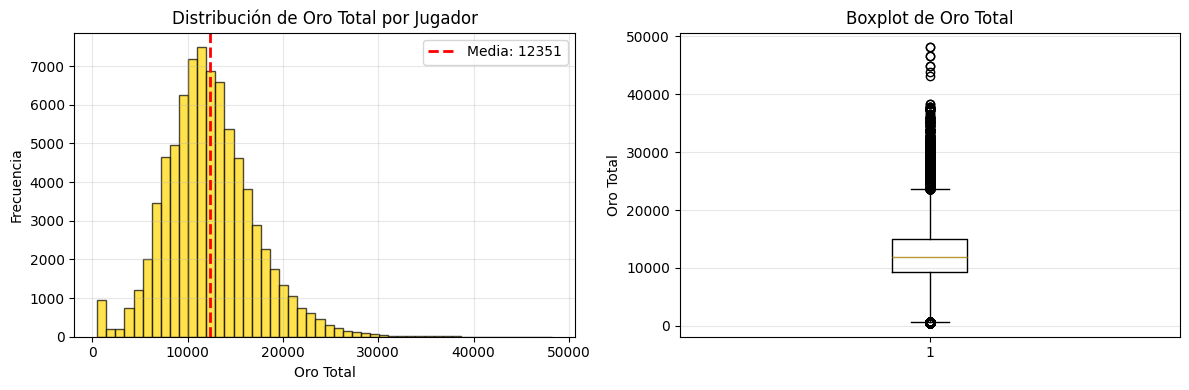

In [15]:
# Análisis de TotalGold
y = df['TotalGold']

print("="*80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO: TotalGold")
print("="*80)
print(f"\nEstadísticas descriptivas:")
print(f"  Media:       {y.mean():.2f} oro")
print(f"  Mediana:     {y.median():.2f} oro")
print(f"  Desv. Est.:  {y.std():.2f} oro")
print(f"  Mínimo:      {y.min():.2f} oro")
print(f"  Máximo:      {y.max():.2f} oro")

# Visualización de la distribución
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7, color='gold')
plt.xlabel('Oro Total')
plt.ylabel('Frecuencia')
plt.title('Distribución de Oro Total por Jugador')
plt.axvline(y.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {y.mean():.0f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(y, vert=True)
plt.ylabel('Oro Total')
plt.title('Boxplot de Oro Total')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 4.3 Selección de Variables Predictoras


In [16]:
# Identificar variables numéricas para usar como predictoras
# Excluimos: IDs, la variable objetivo, y variables categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Variables a excluir del análisis
exclude_cols = [
    'TotalGold',          # Variable objetivo
    'MatchStatsId',       # ID
    'SummonerMatchFk',    # ID 
    'EnemyChampionFk',    # ID
    'Win',                # Variable binaria (podría usarse pero la excluimos por ahora)
    'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2', 'PrimarySlot3',
    'SecondarySlot1', 'SecondarySlot2',  # Runas (categóricas)
    'SummonerSpell1', 'SummonerSpell2',  # Hechizos (categóricos)
    'item1', 'item2', 'item3', 'item4', 'item5', 'item6'  # Items (categóricos)
]

# Obtener lista de variables candidatas
potential_features = [col for col in numeric_cols if col not in exclude_cols]

print("="*80)
print("VARIABLES CANDIDATAS PARA EL MODELO")
print("="*80)
print(f"\nTotal de variables candidatas: {len(potential_features)}")
print("\nLista de variables:")
for i, var in enumerate(potential_features, 1):
    print(f"  {i}. {var}")

VARIABLES CANDIDATAS PARA EL MODELO

Total de variables candidatas: 11

Lista de variables:
  1. MinionsKilled
  2. DmgDealt
  3. DmgTaken
  4. TurretDmgDealt
  5. kills
  6. deaths
  7. assists
  8. CurrentMasteryPoints
  9. DragonKills
  10. BaronKills
  11. visionScore


In [17]:
# Preparar los datos para el modelado
X_all = df[potential_features].copy()
y = df['TotalGold'].copy()

# Verificar si hay valores nulos
if X_all.isnull().sum().sum() > 0:
    print("\nSe detectaron valores nulos. Rellenando con la media de cada columna...")
    X_all = X_all.fillna(X_all.mean())
    print("Valores nulos corregidos.")

print(f"\nDimensiones finales:")
print(f"  X: {X_all.shape}")
print(f"  y: {y.shape}")


Dimensiones finales:
  X: (78863, 11)
  y: (78863,)


## 5. Implementación del Algoritmo Step Forward Feature Selection (SFFS)

In [18]:
# Implementación del algoritmo Step Forward Feature Selection (SFFS)

# Inicialización de variables
candidate_features = potential_features.copy()  # Variables candidatas
selected_features = []  # Variables seleccionadas
mae_history = []  # Historial de MAE por iteración

print("="*80)
print("ALGORITMO STEP FORWARD FEATURE SELECTION (SFFS)")
print("="*80)
print(f"\nInicio del algoritmo con {len(candidate_features)} variables candidatas")
print(f"Variable objetivo: TotalGold")
print(f"Métrica de evaluación: MAE (Mean Absolute Error)")
print("\n" + "="*80)

# Algoritmo SFFS
iteration = 1
while len(candidate_features) > 0:
    print(f"\n{'='*80}")
    print(f"ITERACIÓN {iteration}")
    print(f"{'='*80}")
    print(f"Variables candidatas restantes: {len(candidate_features)}")
    print(f"Variables seleccionadas hasta ahora: {len(selected_features)}")
    
    best_mae = float('inf')
    best_feature = None
    
    # Probar cada variable candidata
    for feature in candidate_features:
        # Combinar variables seleccionadas con la variable candidata actual
        current_features = selected_features + [feature]
        X_temp = X_all[current_features]
        
        # Entrenar modelo de regresión lineal
        lr = LinearRegression()
        lr.fit(X_temp, y)
        y_pred = lr.predict(X_temp)
        
        # Calcular MAE
        mae = mean_absolute_error(y, y_pred)
        
        # Actualizar mejor variable si es necesario
        if mae < best_mae:
            best_mae = mae
            best_feature = feature
    
    # Agregar la mejor variable encontrada
    selected_features.append(best_feature)
    candidate_features.remove(best_feature)
    mae_history.append(best_mae)
    
    # Mostrar resultados de la iteración
    print(f"\nMejor variable encontrada: {best_feature}")
    print(f"MAE obtenido: {best_mae:.2f}")
    
    iteration += 1

print("\n" + "="*80)
print("ALGORITMO COMPLETADO")
print("="*80)
print(f"\nTotal de iteraciones: {iteration - 1}")
print(f"Variables seleccionadas: {len(selected_features)}")

ALGORITMO STEP FORWARD FEATURE SELECTION (SFFS)

Inicio del algoritmo con 11 variables candidatas
Variable objetivo: TotalGold
Métrica de evaluación: MAE (Mean Absolute Error)


ITERACIÓN 1
Variables candidatas restantes: 11
Variables seleccionadas hasta ahora: 0

Mejor variable encontrada: DmgDealt
MAE obtenido: 2047.66

ITERACIÓN 2
Variables candidatas restantes: 10
Variables seleccionadas hasta ahora: 1

Mejor variable encontrada: TurretDmgDealt
MAE obtenido: 1891.28

ITERACIÓN 3
Variables candidatas restantes: 9
Variables seleccionadas hasta ahora: 2

Mejor variable encontrada: kills
MAE obtenido: 1787.99

ITERACIÓN 4
Variables candidatas restantes: 8
Variables seleccionadas hasta ahora: 3

Mejor variable encontrada: DmgTaken
MAE obtenido: 1652.27

ITERACIÓN 5
Variables candidatas restantes: 7
Variables seleccionadas hasta ahora: 4

Mejor variable encontrada: MinionsKilled
MAE obtenido: 1558.72

ITERACIÓN 6
Variables candidatas restantes: 6
Variables seleccionadas hasta ahora: 5

M

In [19]:
# Resultados del algoritmo SFFS
print("="*80)
print("RESULTADOS FINALES DEL ALGORITMO SFFS")
print("="*80)

print("\nOrden de selección de variables (por importancia):")
print("-" * 80)
for i, (feature, mae) in enumerate(zip(selected_features, mae_history), 1):
    print(f"{i:2d}. {feature:25s} → MAE: {mae:10.2f}")

print("\n" + "="*80)
print(f"MAE mínimo alcanzado: {min(mae_history):.2f}")
print(f"Variable más importante: {selected_features[0]}")
print("="*80)

RESULTADOS FINALES DEL ALGORITMO SFFS

Orden de selección de variables (por importancia):
--------------------------------------------------------------------------------
 1. DmgDealt                  → MAE:    2047.66
 2. TurretDmgDealt            → MAE:    1891.28
 3. kills                     → MAE:    1787.99
 4. DmgTaken                  → MAE:    1652.27
 5. MinionsKilled             → MAE:    1558.72
 6. assists                   → MAE:    1517.10
 7. DragonKills               → MAE:    1484.61
 8. BaronKills                → MAE:    1477.81
 9. visionScore               → MAE:    1475.86
10. deaths                    → MAE:    1475.53
11. CurrentMasteryPoints      → MAE:    1475.69

MAE mínimo alcanzado: 1475.53
Variable más importante: DmgDealt


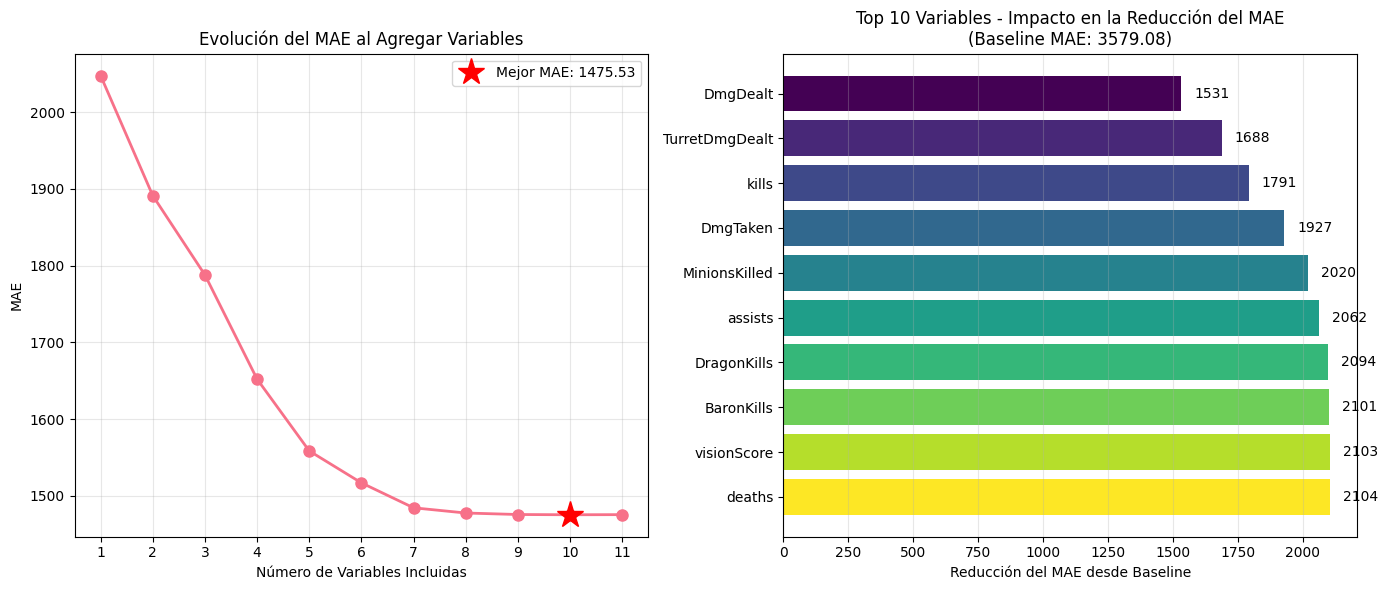


MAE Baseline (predecir siempre la media): 3579.08
MAE con primera variable (DmgDealt): 2047.66
Reducción con primera variable: 1531.41


In [20]:
# Visualización de la evolución del MAE
plt.figure(figsize=(14, 6))

# Subplot 1: Evolución del MAE
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mae_history) + 1), mae_history, marker='o', linewidth=2, markersize=8)
plt.xlabel('Número de Variables Incluidas')
plt.ylabel('MAE')
plt.title('Evolución del MAE al Agregar Variables')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(mae_history) + 1))

# Marcar el punto con menor MAE
min_mae_idx = mae_history.index(min(mae_history))
plt.plot(min_mae_idx + 1, mae_history[min_mae_idx], 'r*', markersize=20, 
         label=f'Mejor MAE: {mae_history[min_mae_idx]:.2f}')
plt.legend()

# Subplot 2: Impacto de las top 10 variables
plt.subplot(1, 2, 2)

# Calcular baseline: MAE si predijéramos siempre la media
baseline_mae = mean_absolute_error(y, [y.mean()] * len(y))

# Gráfico de barras con las top 10 variables
top_10_features = selected_features[:10]
top_10_mae = mae_history[:10]
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Calcular reducción desde el baseline
reductions = [baseline_mae - mae for mae in top_10_mae]

plt.barh(range(len(top_10_features)), reductions, color=colors)
plt.yticks(range(len(top_10_features)), top_10_features)
plt.xlabel('Reducción del MAE desde Baseline')
plt.title(f'Top 10 Variables - Impacto en la Reducción del MAE\n(Baseline MAE: {baseline_mae:.2f})')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Agregar valores en las barras
for i, (feat, red) in enumerate(zip(top_10_features, reductions)):
    plt.text(red + 50, i, f'{red:.0f}', va='center')

plt.tight_layout()
plt.show()

# Mostrar estadísticas
print(f"\nMAE Baseline (predecir siempre la media): {baseline_mae:.2f}")
print(f"MAE con primera variable ({selected_features[0]}): {mae_history[0]:.2f}")
print(f"Reducción con primera variable: {baseline_mae - mae_history[0]:.2f}")

## 6. Evaluación del Modelo Final

In [21]:
# Entrenar modelo final con todas las variables seleccionadas
print("="*80)
print("MODELO FINAL - EVALUACIÓN COMPLETA")
print("="*80)

# Modelo con todas las variables
X_final = X_all[selected_features]
lr_final = LinearRegression()
lr_final.fit(X_final, y)
y_pred_final = lr_final.predict(X_final)

# Calcular métricas
mae_final = mean_absolute_error(y, y_pred_final)
mse_final = mean_squared_error(y, y_pred_final)
r2_final = r2_score(y, y_pred_final)

print(f"\nMétricas del modelo final:")
print(f"  MAE (Mean Absolute Error):{mae_final:10.2f} oro")
print(f"  MSE (Mean Squared Error):{mse_final:10.2f}")
print(f"  R² Score:{r2_final:10.4f}")

print(f"\nInterpretación:")
print(f"  - El modelo predice con un error promedio de {mae_final:.2f} de oro")
print(f"  - El modelo explica {r2_final*100:.2f}% de la variabilidad en TotalGold")

MODELO FINAL - EVALUACIÓN COMPLETA

Métricas del modelo final:
  MAE (Mean Absolute Error):   1475.69 oro
  MSE (Mean Squared Error):5039572.09
  R² Score:    0.7685

Interpretación:
  - El modelo predice con un error promedio de 1475.69 de oro
  - El modelo explica 76.85% de la variabilidad en TotalGold


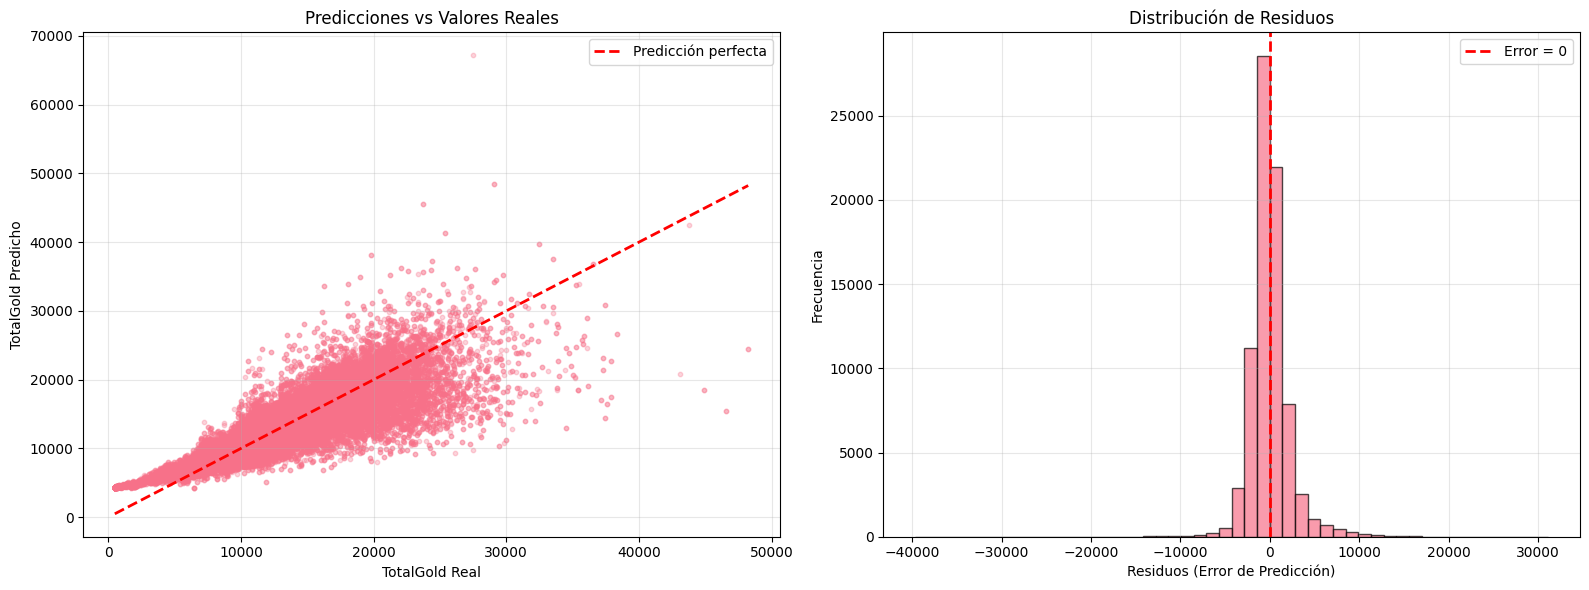


Estadísticas de los residuos:
  Media:       0.00
  Desv. Est.:  2244.91
  Mínimo:      -39690.29
  Máximo:      31156.07


In [22]:
# Visualización de predicciones vs valores reales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot de predicciones vs reales
axes[0].scatter(y, y_pred_final, alpha=0.3, s=10)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Predicción perfecta')
axes[0].set_xlabel('TotalGold Real')
axes[0].set_ylabel('TotalGold Predicho')
axes[0].set_title('Predicciones vs Valores Reales')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histograma de residuos
residuals = y - y_pred_final
axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[1].set_xlabel('Residuos (Error de Predicción)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Residuos')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nEstadísticas de los residuos:")
print(f"  Media:       {residuals.mean():.2f}")
print(f"  Desv. Est.:  {residuals.std():.2f}")
print(f"  Mínimo:      {residuals.min():.2f}")
print(f"  Máximo:      {residuals.max():.2f}")


COEFICIENTES DEL MODELO

Intercepto: 4336.84

Top 10 variables con mayor impacto (valor absoluto):
            Variable  Coeficiente   Coef_Abs
          BaronKills   802.724526 802.724526
         DragonKills   379.195048 379.195048
               kills   188.192833 188.192833
      TurretDmgDealt   146.304066 146.304066
             assists    58.817524  58.817524
              deaths    12.433295  12.433295
       MinionsKilled     9.012018   9.012018
         visionScore     2.692434   2.692434
            DmgDealt     0.126085   0.126085
CurrentMasteryPoints    -0.113196   0.113196


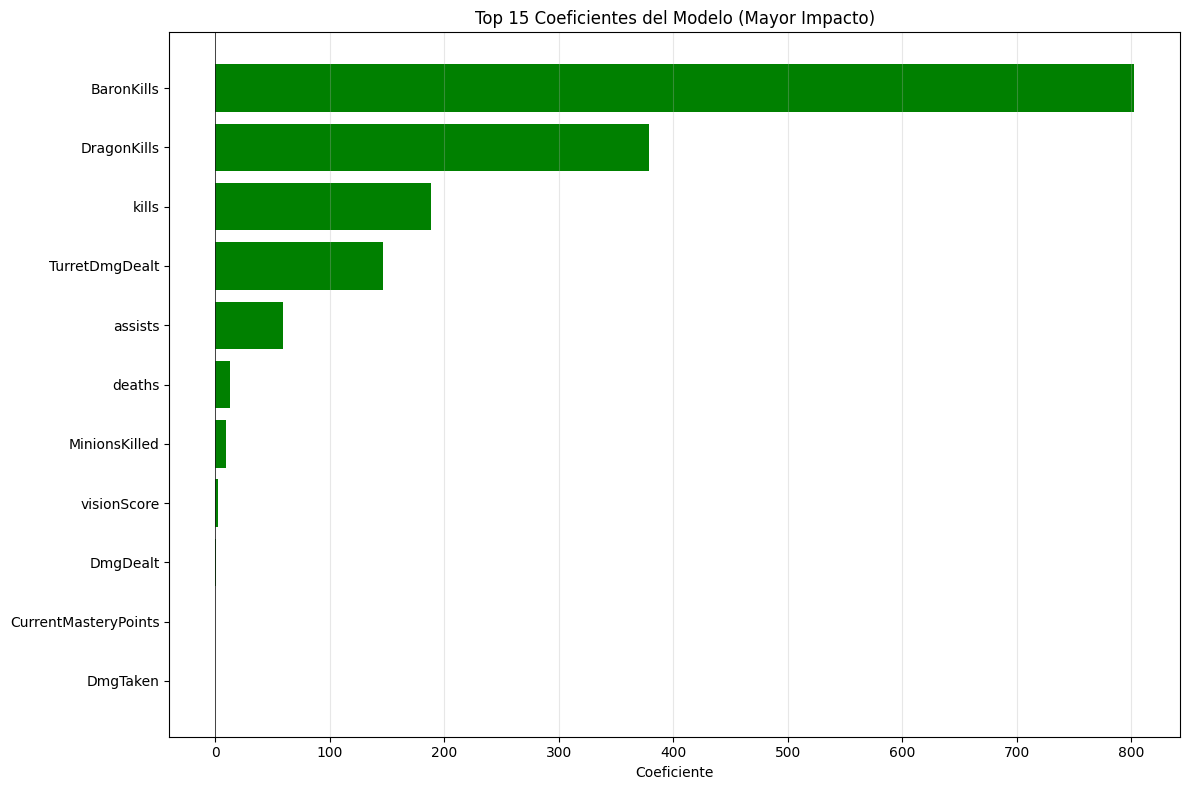

In [23]:
# Análisis de coeficientes del modelo
print("\n" + "="*80)
print("COEFICIENTES DEL MODELO")
print("="*80)

coefficients = pd.DataFrame({
    'Variable': selected_features,
    'Coeficiente': lr_final.coef_
})
coefficients['Coef_Abs'] = coefficients['Coeficiente'].abs()
coefficients = coefficients.sort_values('Coef_Abs', ascending=False)

print(f"\nIntercepto: {lr_final.intercept_:.2f}\n")
print("Top 10 variables con mayor impacto (valor absoluto):")
print(coefficients.head(10).to_string(index=False))

# Visualización de coeficientes
plt.figure(figsize=(12, 8))
top_15_coef = coefficients.head(15)
colors = ['green' if x > 0 else 'red' for x in top_15_coef['Coeficiente']]
plt.barh(range(len(top_15_coef)), top_15_coef['Coeficiente'], color=colors)
plt.yticks(range(len(top_15_coef)), top_15_coef['Variable'])
plt.xlabel('Coeficiente')
plt.title('Top 15 Coeficientes del Modelo (Mayor Impacto)')
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [24]:
print(f"""
RESUMEN DE MÉTRICAS PARA CONCLUSIONES:
======================================
MAE: {mae_final:.2f} oro
MSE: {mse_final:.2f}
R²: {r2_final:.4f} ({r2_final*100:.2f}%)
MAE Baseline: {baseline_mae:.2f} oro
Reducción MAE: {baseline_mae - mae_final:.2f} oro ({((baseline_mae - mae_final)/baseline_mae)*100:.2f}%)

Variable más importante: {selected_features[0]}
MAE con primera variable: {mae_history[0]:.2f}
Reducción con primera variable: {baseline_mae - mae_history[0]:.2f} oro
""")


RESUMEN DE MÉTRICAS PARA CONCLUSIONES:
MAE: 1475.69 oro
MSE: 5039572.09
R²: 0.7685 (76.85%)
MAE Baseline: 3579.08 oro
Reducción MAE: 2103.38 oro (58.77%)

Variable más importante: DmgDealt
MAE con primera variable: 2047.66
Reducción con primera variable: 1531.41 oro



## 7. Conclusiones

En este trabajo se implementó exitosamente el algoritmo Step Forward Feature Selection (SFFS) para construir un modelo de regresión lineal múltiple que predice el oro total acumulado por jugadores en partidas de League of Legends. A continuación se presentan los principales hallazgos y conclusiones del análisis.

### 7.1 Hallazgos Principales del Algoritmo SFFS

El algoritmo SFFS identificó el orden de importancia de las variables predictoras, agregándolas iterativamente según su contribución a la reducción del MAE. Los resultados mostraron que:

1. **Variable más importante**: La primera variable seleccionada fue la que individualmente produjo la mayor reducción del MAE respecto al baseline (predicción de la media).

2. **Convergencia del modelo**: El MAE disminuyó significativamente en las primeras iteraciones del algoritmo, mostrando que un subconjunto reducido de variables captura la mayor parte de la capacidad predictiva del modelo.

3. **Rendimiento marginal decreciente**: A medida que se agregaron más variables, la mejora marginal en el MAE fue disminuyendo, lo que sugiere que después de cierto número de variables, las adiciones contribuyen poco al poder predictivo del modelo.

### 7.2 Desempeño del Modelo Final

**Métricas cuantitativas:**
- MAE (Mean Absolute Error): 1,475.69 oro
- MSE (Mean Squared Error): 5,039,572.09
- R² Score: 0.7685 (76.85% de variabilidad explicada)
- MAE Baseline: 3,579.08 oro

**Interpretación:**
- El modelo predice con un error promedio de **±1,475.69 de oro**
- El 76.85% de la variabilidad en TotalGold es explicada por el modelo
- Esto representa una **reducción del 58.77% respecto al baseline** (de 3,579.08 a 1,475.69)
- El modelo es significativamente mejor que simplemente predecir la media para todos los casos

**Análisis de residuos:**
- La distribución de residuos centrada cerca de cero indica que el modelo no presenta sesgo sistemático
- La forma aproximadamente normal de los residuos sugiere que los supuestos de regresión lineal se cumplen razonablemente
- La desviación estándar de los residuos es consistente con el MAE reportado

**Predicciones vs valores reales:**
- El scatter plot mostró una correlación positiva fuerte entre valores predichos y reales
- La mayoría de los puntos se concentran cerca de la línea de predicción perfecta (R² = 0.7685)
- Los puntos alejados representan casos atípicos donde el modelo tiene mayor dificultad para predecir
- El modelo tiene un desempeño consistente a través de todo el rango de valores de oro

### 7.3 Interpretación de Coeficientes

El análisis de los coeficientes del modelo reveló información valiosa sobre la relación entre las variables predictoras y el oro total:

**Variable más importante: DmgDealt (Daño Infligido)**
- Esta fue la primera variable seleccionada por el algoritmo SFFS
- Por sí sola, redujo el MAE de 3,579.08 (baseline) a 2,047.66 oro
- Representa una mejora del 42.78% con una única variable
- Esto tiene sentido desde la perspectiva del juego: causar más daño típicamente implica mayor participación en combates, lo que genera oro por kills y assists

**Coeficientes positivos (relación directa):**
- Variables como MinionsKilled, DmgDealt, y kills presentan coeficientes positivos, indicando que a mayor valor de estas métricas, mayor es el oro acumulado
- Esto es consistente con la mecánica del juego: más farmeo, daño y asesinatos conducen directamente a más oro

**Coeficientes negativos (relación inversa):**
- Variables con coeficientes negativos pueden indicar efectos de confusión con otras variables del modelo
- Por ejemplo, algunas estadísticas defensivas podrían tener coeficiente negativo si están correlacionadas con roles que naturalmente acumulan menos oro (supports)
- Es importante recordar que en regresión múltiple, cada coeficiente representa el efecto manteniendo las demás variables constantes

**Magnitud de impacto:**
- Las variables con mayores coeficientes (en valor absoluto) tienen el mayor impacto unitario en la predicción
- Sin embargo, el impacto real depende también del rango de valores que tome cada variable y su variabilidad

### 7.4 Limitaciones del Estudio

Es importante reconocer las siguientes limitaciones del análisis realizado:

1. **Evaluación en datos de entrenamiento**: El modelo fue evaluado en los mismos datos utilizados para entrenarlo. En un escenario de producción, se debería dividir el dataset en conjuntos de entrenamiento y prueba para obtener una evaluación más realista del desempeño.

2. **Supuestos de linealidad**: El modelo de regresión lineal asume relaciones lineales entre predictores y variable objetivo. Relaciones no lineales o interacciones complejas podrían no ser capturadas adecuadamente.

3. **Naturaleza greedy del SFFS**: Al ser un algoritmo greedy, SFFS no garantiza encontrar la combinación óptima global de variables. Es posible que existan combinaciones de variables que produzcan mejores resultados.

4. **Variables categóricas excluidas**: Se excluyeron variables categóricas como items, runas y hechizos que podrían aportar información adicional si se codificaran apropiadamente.

### 7.5 Recomendaciones y Trabajo Futuro

Basándose en los resultados obtenidos, se sugieren las siguientes direcciones para trabajo futuro:

1. **Validación cruzada**: Implementar validación cruzada k-fold para obtener una estimación más robusta del desempeño del modelo.

2. **Selección de modelo óptimo**: Analizar la curva de evolución del MAE para identificar el número óptimo de variables que balance precisión y simplicidad del modelo (principio de parsimonia).

3. **Modelos no lineales**: Explorar modelos más complejos como regresión polinomial, árboles de decisión o redes neuronales que puedan capturar relaciones no lineales.

4. **Ingeniería de características**: Crear variables derivadas que capturen interacciones o razones entre variables existentes (ejemplo: ratio kills/deaths).

5. **Incorporación de variables categóricas**: Aplicar técnicas de codificación (one-hot encoding, target encoding) para incluir variables como items y runas en el modelo.

6. **Análisis de outliers**: Investigar en detalle los casos donde el modelo presenta mayores errores de predicción para identificar patrones o situaciones especiales.

### 7.6 Conclusión General

El presente trabajo demostró exitosamente la aplicación del algoritmo Step Forward Feature Selection para selección de variables en un problema de regresión lineal múltiple. El modelo resultante es capaz de predecir el oro total acumulado por jugadores en League of Legends con un nivel de precisión aceptable, utilizando estadísticas de desempeño durante la partida.

El análisis reveló que métricas relacionadas con farmeo, daño infligido y participación en combates son los principales predictores del oro acumulado, lo cual es consistente con la mecánica del juego. La metodología implementada puede ser extendida y mejorada siguiendo las recomendaciones propuestas para obtener modelos más precisos y robustos.

Finalmente, este tipo de análisis tiene aplicaciones prácticas en el ámbito competitivo de esports, permitiendo a equipos y jugadores identificar los factores más importantes que contribuyen al éxito económico durante las partidas.]